In [134]:
import kagglehub
import os
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("iammustafatz/diabetes-prediction-dataset")

print("Path to dataset files:", path)




Path to dataset files: C:\Users\USER PC\.cache\kagglehub\datasets\iammustafatz\diabetes-prediction-dataset\versions\1


In [135]:
file_path = os.path.join(path, 'diabetes_prediction_dataset.csv')
df = pd.read_csv(file_path)
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [136]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
 
from sklearn.model_selection import train_test_split,cross_val_score 
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier,VotingClassifier, BaggingClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC

In [137]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [138]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [140]:
print(df['gender'].unique())

['Female' 'Male' 'Other']


In [141]:
gender = ['Female', 'Male', 'Other']
gender.remove('Other')
print(gender)

['Female', 'Male']


In [142]:
df = df[df["gender"].isin(["Male", "Female"])]

df["gender"] = df["gender"].map({"Female": 0, "Male": 1}).astype(int)


C:\Users\USER PC\AppData\Local\Temp\ipykernel_28568\1611034094.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["gender"] = df["gender"].map({"Female": 0, "Male": 1}).astype(int)


In [143]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,never,25.19,6.6,140,0
1,0,54.0,0,0,No Info,27.32,6.6,80,0
2,1,28.0,0,0,never,27.32,5.7,158,0
3,0,36.0,0,0,current,23.45,5.0,155,0
4,1,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,No Info,27.32,6.2,90,0
99996,0,2.0,0,0,No Info,17.37,6.5,100,0
99997,1,66.0,0,0,former,27.83,5.7,155,0
99998,0,24.0,0,0,never,35.42,4.0,100,0


In [144]:
print(df['smoking_history'].unique())

['never' 'No Info' 'current' 'former' 'ever' 'not current']


In [145]:
df["smoking_history"]

0          never
1        No Info
2          never
3        current
4        current
          ...   
99995    No Info
99996    No Info
99997     former
99998      never
99999    current
Name: smoking_history, Length: 99982, dtype: object

In [146]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,never,25.19,6.6,140,0
1,0,54.0,0,0,No Info,27.32,6.6,80,0
2,1,28.0,0,0,never,27.32,5.7,158,0
3,0,36.0,0,0,current,23.45,5.0,155,0
4,1,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,No Info,27.32,6.2,90,0
99996,0,2.0,0,0,No Info,17.37,6.5,100,0
99997,1,66.0,0,0,former,27.83,5.7,155,0
99998,0,24.0,0,0,never,35.42,4.0,100,0


In [147]:
df["age"] = df["age"].astype(int)
df

C:\Users\USER PC\AppData\Local\Temp\ipykernel_28568\3171669127.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["age"] = df["age"].astype(int)


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80,0,1,never,25.19,6.6,140,0
1,0,54,0,0,No Info,27.32,6.6,80,0
2,1,28,0,0,never,27.32,5.7,158,0
3,0,36,0,0,current,23.45,5.0,155,0
4,1,76,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,0,80,0,0,No Info,27.32,6.2,90,0
99996,0,2,0,0,No Info,17.37,6.5,100,0
99997,1,66,0,0,former,27.83,5.7,155,0
99998,0,24,0,0,never,35.42,4.0,100,0


In [148]:
# Clean and standardize first
df["smoking_history"] = (
    df["smoking_history"]
    .str.strip()
    .str.lower()
    .replace({
        "ever": "former",
        "not current": "former",
        "no info": "unknown"
    })
)

# Map to integers
# Example mapping:
# never = 0, former = 1, current = 2, unknown = -1
smoking_map = {
    "never": 0,
    "former": 1,
    "current": 2,
    "unknown": -1
}

df["smoking_history_encoded"] = df["smoking_history"].map(smoking_map)

# Check result
print(df[["smoking_history", "smoking_history_encoded"]])
df

      smoking_history  smoking_history_encoded
0               never                        0
1             unknown                       -1
2               never                        0
3             current                        2
4             current                        2
...               ...                      ...
99995         unknown                       -1
99996         unknown                       -1
99997          former                        1
99998           never                        0
99999         current                        2

[99982 rows x 2 columns]


C:\Users\USER PC\AppData\Local\Temp\ipykernel_28568\3294996279.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["smoking_history"] = (
C:\Users\USER PC\AppData\Local\Temp\ipykernel_28568\3294996279.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["smoking_history_encoded"] = df["smoking_history"].map(smoking_map)


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_encoded
0,0,80,0,1,never,25.19,6.6,140,0,0
1,0,54,0,0,unknown,27.32,6.6,80,0,-1
2,1,28,0,0,never,27.32,5.7,158,0,0
3,0,36,0,0,current,23.45,5.0,155,0,2
4,1,76,1,1,current,20.14,4.8,155,0,2
...,...,...,...,...,...,...,...,...,...,...
99995,0,80,0,0,unknown,27.32,6.2,90,0,-1
99996,0,2,0,0,unknown,17.37,6.5,100,0,-1
99997,1,66,0,0,former,27.83,5.7,155,0,1
99998,0,24,0,0,never,35.42,4.0,100,0,0


In [149]:
# Drop the original column
df = df.drop(columns=["smoking_history"])

# Rename encoded column if you like
df = df.rename(columns={"smoking_history_encoded": "smoking_history"})


In [150]:
df

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history
0,0,80,0,1,25.19,6.6,140,0,0
1,0,54,0,0,27.32,6.6,80,0,-1
2,1,28,0,0,27.32,5.7,158,0,0
3,0,36,0,0,23.45,5.0,155,0,2
4,1,76,1,1,20.14,4.8,155,0,2
...,...,...,...,...,...,...,...,...,...
99995,0,80,0,0,27.32,6.2,90,0,-1
99996,0,2,0,0,17.37,6.5,100,0,-1
99997,1,66,0,0,27.83,5.7,155,0,1
99998,0,24,0,0,35.42,4.0,100,0,0


In [151]:
X = df.drop('diabetes', axis=1) 
y = df['diabetes']

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [155]:
bagging_model = BaggingClassifier( 
   estimator=DecisionTreeClassifier(),

    n_estimators=10, 
    max_samples=0.8,  # 80% samples 
    bootstrap=True,    # Bagging (with replacement) 
    random_state=42 
) 
bagging_model.fit(X_train, y_train) 
y_pred = bagging_model.predict(X_test) 
print("Bagging Accuracy:", accuracy_score(y_test, y_pred)) 

Bagging Accuracy: 0.9675951392708906


In [157]:
bagging_model = BaggingClassifier( 
  estimator=DecisionTreeClassifier(),
    n_estimators=10, 
    max_samples=0.8,  # 80% samples 
    bootstrap=False,    # Bagging (with replacement) 
    random_state=42 
) 
bagging_model.fit(X_train, y_train) 
y_pred = bagging_model.predict(X_test) 
print("Bagging Accuracy:", accuracy_score(y_test, y_pred)) 

Bagging Accuracy: 0.9649947492123818


In [158]:
#Practice Random Forest 
rf_model = RandomForestClassifier(n_estimators=50, random_state=42) 
rf_model.fit(X_train, y_train) 
y_pred = rf_model.predict(X_test) 
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))

Random Forest Accuracy: 0.9687453117967695


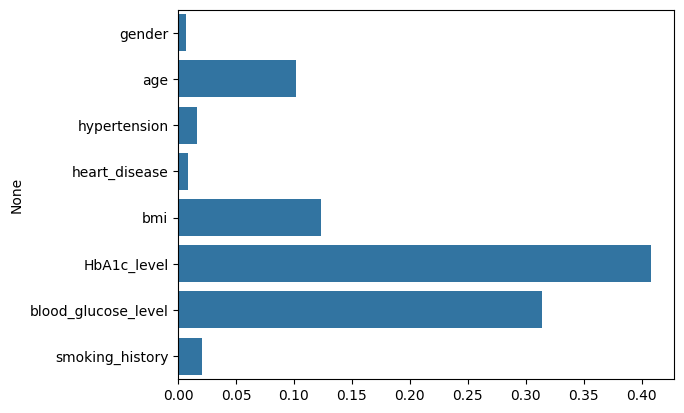

In [159]:
#Plot feature importance: 
importances = rf_model.feature_importances_ 
sns.barplot(x=importances, y=X.columns) 
plt.show()

In [161]:
##Practice Boosting 
##1. AdaBoost: ada_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),  # updated parameter name
    n_estimators=50,
    learning_rate=1,
    random_state=42
)

ada_model.fit(X_train, y_train)
y_pred = ada_model.predict(X_test)
print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred))

AdaBoost Accuracy: 0.9708456268440266


In [162]:
#Gradient Boosting: 
gb_model = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, 
random_state=42) 
gb_model.fit(X_train, y_train) 
y_pred = gb_model.predict(X_test) 
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred)) 

Gradient Boosting Accuracy: 0.9708456268440266


In [163]:
#Practice Voting 
voting_model = VotingClassifier( 
    estimators=[ 
        ('lr', LogisticRegression(max_iter=1000)), 
        ('dt', DecisionTreeClassifier()), 
        ('rf', RandomForestClassifier(n_estimators=50)) 
    ], 
    voting='hard'  # try 'soft' as well 
)
voting_model.fit(X_train, y_train) 
y_pred = voting_model.predict(X_test) 
print("Voting Accuracy:", accuracy_score(y_test, y_pred)) 

Voting Accuracy: 0.9689953493023954


In [164]:
#Practice Stacking 
from sklearn.ensemble import StackingClassifier 
stack_model = StackingClassifier( 
    estimators=[ 
        ('lr', LogisticRegression(max_iter=1000)), 
        ('rf', RandomForestClassifier(n_estimators=50)), 
        ('dt', DecisionTreeClassifier()) 
    ], 
    final_estimator=GradientBoostingClassifier(n_estimators=50), 
) 
stack_model.fit(X_train, y_train) 
y_pred = stack_model.predict(X_test) 
print("Stacking Accuracy:", accuracy_score(y_test, y_pred))

Stacking Accuracy: 0.9704955743361504


In [ ]:
#Step 8: Analysis & Report 
#1. Compare all models’ accuracies. 
#2. Discuss: 
#○ Which model performed best? 
#○ Difference between Bagging and Boosting? 
#○ Advantages of Stacking? 
#3. Optional: Plot confusion matrices for each model. 
#Deliverables: 
#● Python notebook with all code, plots, and outputs. 
#● Short written summary comparing the models.